In [43]:
import pandas as pd

from antea.io.mc_io import load_configuration
from antea.io.mc_io import load_mcTOFsns_response
from antea.io.mc_io import load_mcparticles
from antea.io.mc_io import load_mcsns_response
from antea.database import load_db as db

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
filename1 = 'full_body_phantom.1000.pet.h5'
filename2 = 'full_ring_iradius380mm_z200cm_depth3cm_pitch7mm.000.pet.h5'
h5config1 = load_configuration(filename1)
h5config2 = load_configuration(filename2)

In [3]:
tof_response1 = load_mcTOFsns_response(filename1)
tof_response2 = load_mcTOFsns_response(filename2)

In [4]:
particles1 = load_mcparticles(filename1)
particles2 = load_mcparticles(filename2)
sns_response1 = load_mcsns_response(filename1)
sns_response2 = load_mcsns_response(filename2)

In [5]:
DataSiPM     = db.DataSiPMsim_only('petalo', 0) # full body PET
DataSiPM_idx = DataSiPM.set_index('SensorID')

#First and last s_id:
print(DataSiPM.SensorID.min(), DataSiPM.SensorID.max())
#Num of sensors:
print(DataSiPM.SensorID.max()-1000)
#Num of SiPMs for each row:
print(int((DataSiPM.SensorID.max() - 999)/278))

1000 103303
102303
368


### Check that the max sensor id corresponds to the one of the database:

In [6]:
for evt in sns_response1.event_id.unique():
    sns = sns_response1[sns_response1.event_id==evt]
    #print(sns.sensor_id.max())
    assert sns.sensor_id.max() <= 103303

In [7]:
for evt in sns_response2.event_id.unique():
    sns = sns_response2[sns_response2.event_id==evt]
    #print(sns.sensor_id.max())
    assert sns.sensor_id.max() <= 103303

### Check the tof table does not have times above 50 ns

In [8]:
for evt in sns_response1.event_id.unique():
    tof = tof_response1[tof_response1.event_id==evt]
    max_tof_time = tof.time_bin.max()*5
    assert max_tof_time <= 50000 #ps (50nanoseconds)

In [9]:
for evt in sns_response2.event_id.unique():
    tof = tof_response2[tof_response2.event_id==evt]
    max_tof_time = tof.time_bin.max()*5
    assert max_tof_time <= 50000 #ps (50nanoseconds)

### Check the config:

In [10]:
for i, j in zip(h5config1.param_key, h5config1.param_value):
    for k,l in zip(h5config2.param_key, h5config2.param_value):
        if i == k:
            if j==l:
                continue
            else:
                print(i, j)
                print(k,l)

saved_events 2480
saved_events 2496
interacting_events 16236
interacting_events 16379
/PhysicsList/RegisterPhysics G4EmStandardPhysics_option4
/PhysicsList/RegisterPhysics G4OpticalPhysics
/PhysicsList/RegisterPhysics G4EmStandardPhysics_option4
/PhysicsList/RegisterPhysics G4RadioactiveDecayPhysics
/PhysicsList/RegisterPhysics G4EmStandardPhysics_option4
/PhysicsList/RegisterPhysics G4DecayPhysics
/PhysicsList/RegisterPhysics G4EmStandardPhysics_option4
/PhysicsList/RegisterPhysics NexusPhysics
/PhysicsList/RegisterPhysics G4EmStandardPhysics_option4
/PhysicsList/RegisterPhysics G4StepLimiterPhysics
/PhysicsList/RegisterPhysics G4OpticalPhysics
/PhysicsList/RegisterPhysics G4EmStandardPhysics_option4
/PhysicsList/RegisterPhysics G4OpticalPhysics
/PhysicsList/RegisterPhysics G4RadioactiveDecayPhysics
/PhysicsList/RegisterPhysics G4OpticalPhysics
/PhysicsList/RegisterPhysics G4DecayPhysics
/PhysicsList/RegisterPhysics G4OpticalPhysics
/PhysicsList/RegisterPhysics NexusPhysics
/PhysicsLi

### Draw the geometry:

#### 2D

In [11]:
DataSiPM.head()

,SensorID,X,Y,Z,PhiNumber,ZNumber
0,1000,0.00000,409.600,-969.5,0,0
1,1001,-6.99312,409.540,-969.5,1,0
2,1002,-13.98420,409.361,-969.5,2,0
3,1003,-20.97120,409.063,-969.5,3,0
4,1004,-27.95210,408.645,-969.5,4,0


### From the database

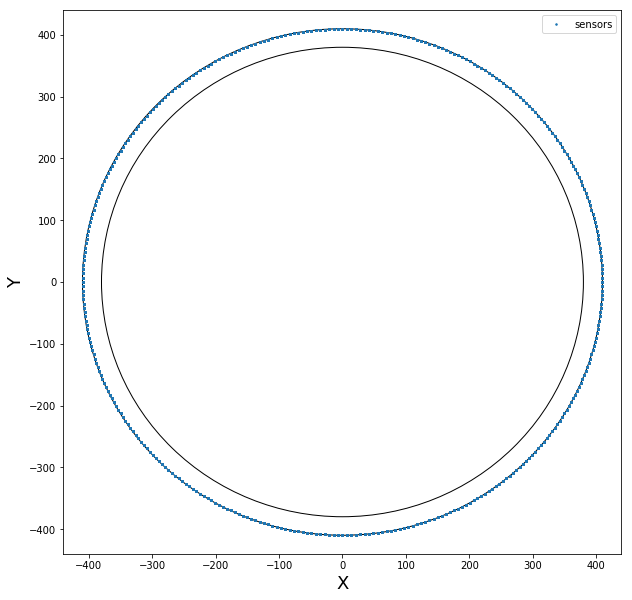

In [12]:
sens_pos_x = DataSiPM.X.values #mm
sens_pos_y = DataSiPM.Y.values #mm
sens_pos_z = DataSiPM.Z.values #mm

## Define the ring
depth_ring = 30  #mm
r_int = 380 #mm
r_ext = r_int + depth_ring
center_point = (0., 0.)

## Define the figure
fig = plt.figure(figsize=(10,10))
limits = r_ext + 30
plt.xlim(-limits, limits)
plt.ylim(-limits, limits)
plt.xlabel('X', size=18)
plt.ylabel('Y', size=18)

circ1 = plt.Circle(center_point, r_int, color='k', fill=False)
circ2 = plt.Circle(center_point, r_ext, color='k', fill=False)

ax = fig.gca()
ax.add_artist(circ1)
ax.add_artist(circ2)

## Plot the sensors
plt.plot( sens_pos_x,  sens_pos_y, '.', markersize=3,  label='sensors')
plt.legend()

### Plotting the geometry from the file

In [14]:
sns_positions1 = pd.read_hdf(filename1, 'MC/sensor_positions')
sns_positions2 = pd.read_hdf(filename2, 'MC/sensor_positions')

In [15]:
sns_positions1.head()

,sensor_id,x,y,z
0,64369,-388.235687,130.557358,234.5
1,72481,-409.062805,20.971203,388.5
2,72850,-409.361206,13.984199,395.5
3,72482,-409.361206,13.984199,388.5
4,64375,-399.551605,90.170288,234.5


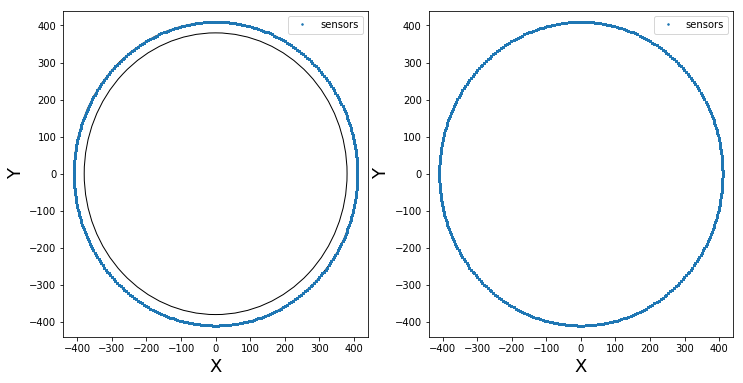

In [41]:
sens_pos_x1 = sns_positions1.x.values #mm
sens_pos_y1 = sns_positions1.y.values #mm
sens_pos_z1 = sns_positions1.z.values #mm

sens_pos_x2 = sns_positions2.x.values #mm
sens_pos_y2 = sns_positions2.y.values #mm
sens_pos_z2 = sns_positions2.z.values #mm

circ1 = plt.Circle(center_point, r_int, color='k', fill=False)
circ2 = plt.Circle(center_point, r_ext, color='k', fill=False)



## Define the figure and the two subplots
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlim(-limits, limits)
ax1.set_ylim(-limits, limits)
ax1.set_xlabel('X', size=18)
ax1.set_ylabel('Y', size=18)

#ax = ax1.gca()
ax1.add_artist(circ1)
ax1.add_artist(circ2)

## Plot the sensors
ax1.plot(sens_pos_x1,  sens_pos_y1, '.', markersize=3,  label='sensors')
ax1.legend()


ax2.set_xlim(-limits, limits)
ax2.set_ylim(-limits, limits)
ax2.set_xlabel('X', size=18)
ax2.set_ylabel('Y', size=18)

#ax2 = f.gca()
#ax2.add_artist(circ1)
#ax2.add_artist(circ2)

## Plot the sensors
ax2.plot(sens_pos_x2,  sens_pos_y2, '.', markersize=3,  label='sensors')
ax2.legend()
plt.tick_params()

### 3D

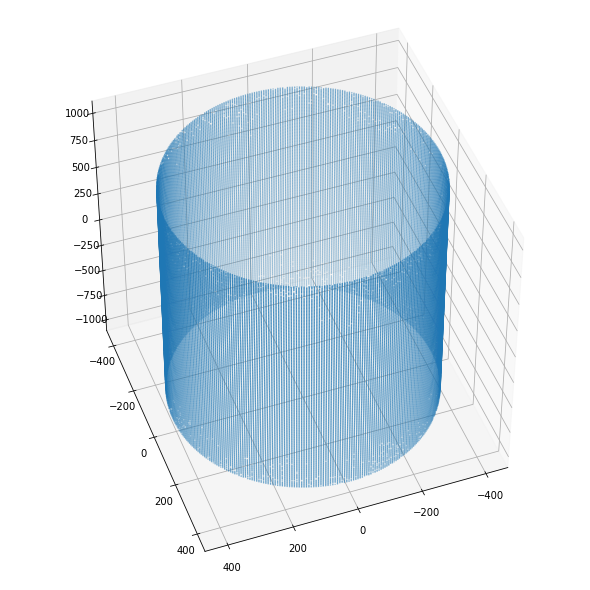

In [50]:
fig = plt.figure(figsize=(8,8))
ax  = Axes3D(fig)
ax.scatter(sens_pos_x1, sens_pos_y1, sens_pos_z1, marker='o', s=0.1)
ax.view_init(azim=70, elev=45)

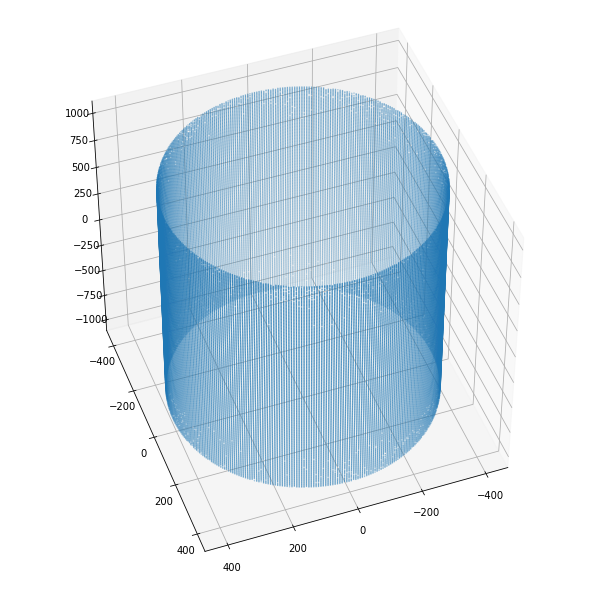

In [51]:
fig = plt.figure(figsize=(8,8))
ax  = Axes3D(fig)
ax.scatter(sens_pos_x2, sens_pos_y2, sens_pos_z2, marker='o', s=0.1)
ax.view_init(azim=70, elev=45)